In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Load the data and change it
lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

In [3]:
# Style sns
sns.set_style("white")
sns.set_context("paper")

In [4]:
colors = {'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

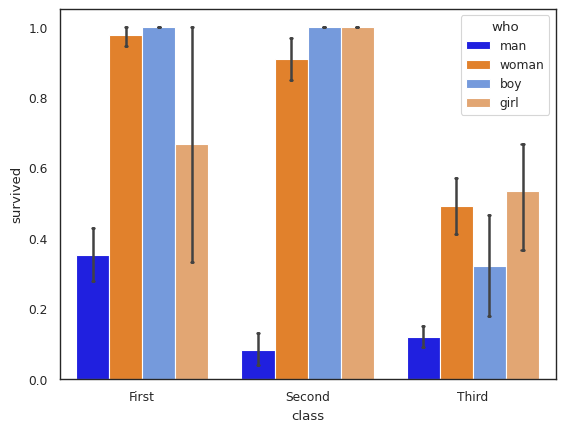

In [5]:
# Plot
sns.barplot(data=lab3_data, x="class", y="survived", hue="who", palette=colors, capsize=0.05, errorbar=("ci", 90))
plt.show()

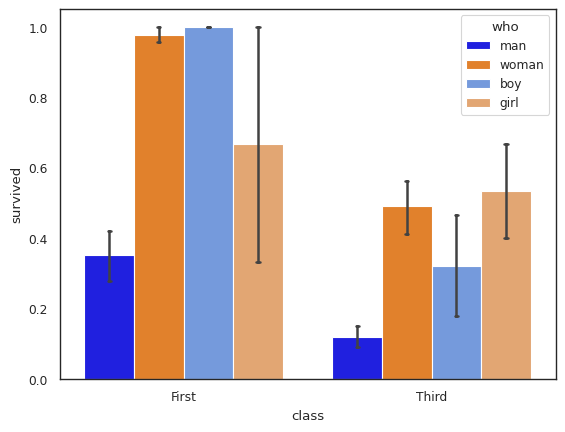

In [6]:
## Remove the second class in the graph
sns.barplot(data=lab3_data, x="class", y="survived", hue="who", palette=colors, order=["First", "Third"], capsize=0.05, errorbar=("ci", 90))
plt.show()

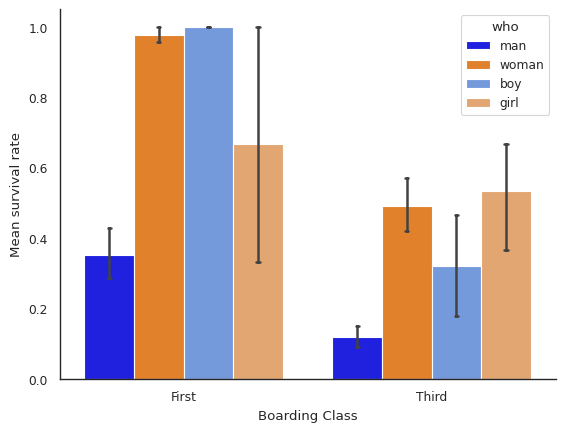

In [7]:
## Change the axis
sns.barplot(data=lab3_data, x="class", y="survived", hue="who",
            palette=colors, order=["First", "Third"], capsize=0.05, errorbar=("ci", 90)).set(ylabel="Mean survival rate", xlabel="Boarding Class")
sns.despine()
plt.show()

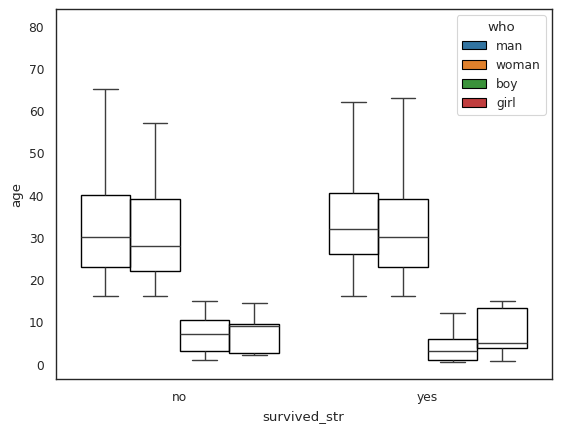

In [8]:
### Plot 2
colorScheme1 = {"edgecolor" : "black", "facecolor" : "white"}
sns.boxplot(data=lab3_data, y='age',  x='survived_str', hue="who", fliersize=0, boxprops=dict({'edgecolor':'black','facecolor':(1,1,1,0)}))
plt.show()

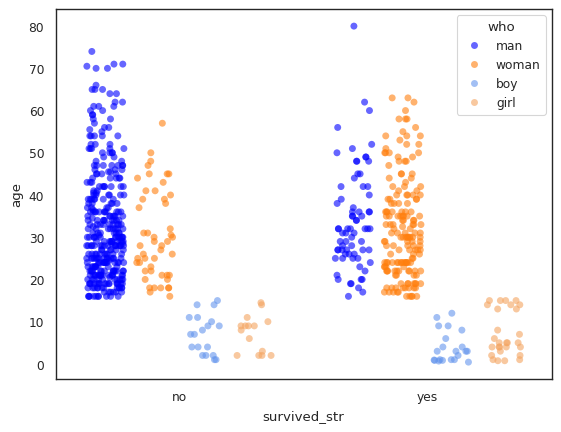

In [9]:
# Stripplot
sns.stripplot(data=lab3_data, x="survived_str", y="age", hue="who", jitter=0.3, alpha=0.6, dodge="true", palette=colors)
plt.show()

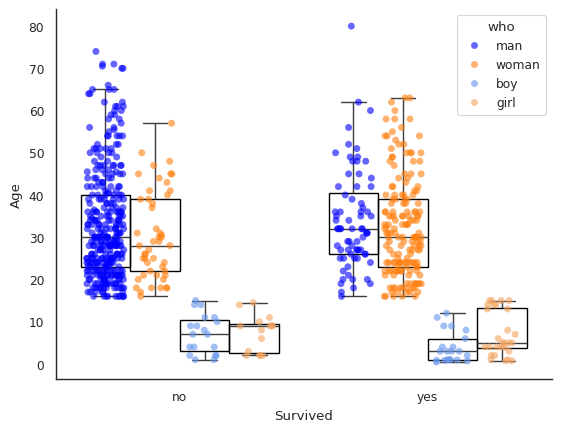

In [10]:
## Combining two outputs and producing the final result

axes2 = sns.boxplot(data=lab3_data, y='age',  x='survived_str', hue="who", fliersize=0, boxprops=dict({'edgecolor':'black','facecolor':(1,1,1,0)}), zorder=0)
axes2 = sns.stripplot(data=lab3_data, x="survived_str", y="age", hue="who", jitter=0.3, alpha=0.6, dodge="true", palette=colors, zorder=5)

handles, labels = axes2.get_legend_handles_labels()

axes2.set(xlabel="Survived", ylabel="Age")
plt.legend(handles[4:8], labels[4:8], title='who')
sns.despine()

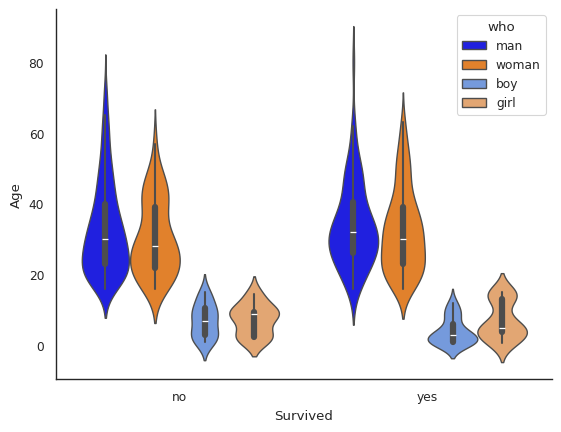

In [11]:
### Plot 3
sns.violinplot(data=lab3_data, x="survived_str", y="age", hue="who", palette=colors).set(xlabel="Survived", ylabel="Age")
sns.despine()
plt.show()

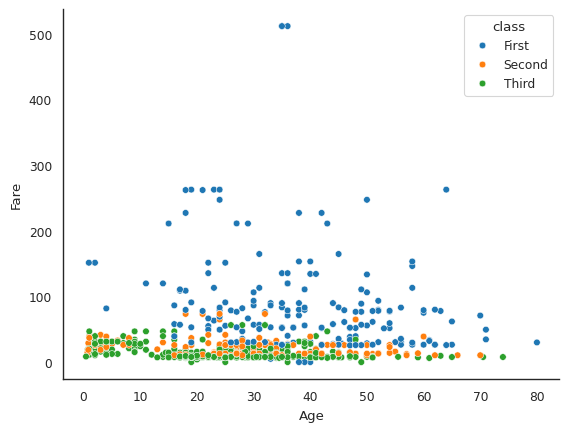

In [12]:
### Plot 4
sns.scatterplot(data=lab3_data, x="age", y="fare", hue="class").set(ylabel="Fare", xlabel="Age")
sns.despine()
plt.show()

In [13]:
### Plot 5
lab3_data_subset = lab3_data[["class", "who", "fare"]]
lab3_data_subset = lab3_data_subset.dropna(how="any")
lab3_data_subsetAverage = lab3_data_subset.groupby(["class", "who"]).mean()
lab3_data_subsetAverage = lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


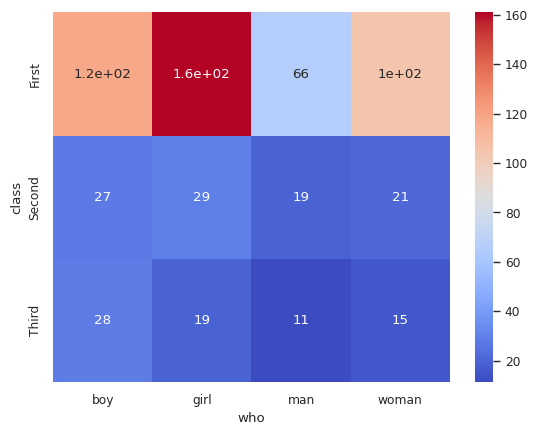

In [38]:
## Convert to matrix data and plot heatmap
matrix_data = lab3_data_subsetAverage.pivot(index="class", columns="who", values="fare")

sns.heatmap(data=matrix_data, annot=True, cmap="coolwarm")
plt.show()

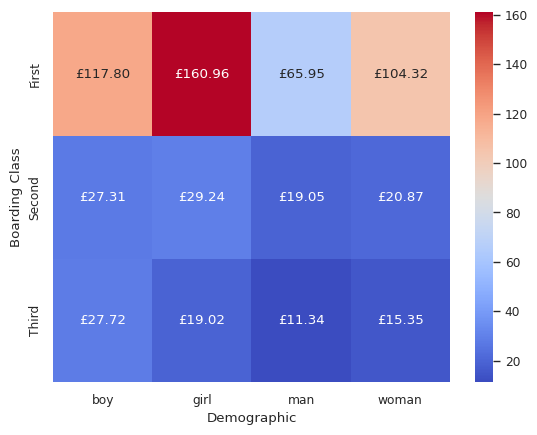

In [40]:
### Plot the heatmap formatted
axes5 = sns.heatmap(data=matrix_data, annot=True,fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])
plt.show()